# Simple orders analysis

🚀 The objective is to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

In [1]:
# Import Modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.append('D:\\Documents\\git\\olist')

from olist.order import Order

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
orders = Order().get_training_data()
orders

D:\Documents\git\olist\olist\order.py:99: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p_f = p_f.groupby(by='order_id').sum()


,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,15.0,0.0,delivered,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.0,19.0,0.0,delivered,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.0,26.0,0.0,delivered,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.0,26.0,0.0,delivered,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.0,12.0,0.0,delivered,1,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,8.0,18.0,0.0,delivered,1,0,5,1,1,72.00,13.08
96357,63943bddc261676b46f01ca7ac2f7bd8,22.0,23.0,0.0,delivered,0,0,4,1,1,174.90,20.10
96358,83c1379a015df1e13d02aae0204711ab,24.0,30.0,0.0,delivered,1,0,5,1,1,205.99,65.02
96359,11c177c8e97725db2631073c19f07b62,17.0,37.0,0.0,delivered,0,0,2,2,1,359.98,81.18


In [4]:
orders.shape

(96353, 12)

## 1 - Inspect features

👉 Summary statistics of each column of the order dataset are as below (`wait_time` is then particularly focused on)

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96353 entries, 0 to 96360
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            96353 non-null  object 
 1   wait_time           96353 non-null  float64
 2   expected_wait_time  96353 non-null  float64
 3   delay_vs_expected   96353 non-null  float64
 4   order_status        96353 non-null  object 
 5   dim_is_five_star    96353 non-null  int32  
 6   dim_is_one_star     96353 non-null  int32  
 7   review_score        96353 non-null  int64  
 8   number_of_products  96353 non-null  int64  
 9   number_of_sellers   96353 non-null  int64  
 10  price               96353 non-null  float64
 11  freight_value       96353 non-null  float64
dtypes: float64(5), int32(2), int64(3), object(2)
memory usage: 8.8+ MB


In [6]:
filtered = orders.filter(items=['wait_time','expected_wait_time','delay_vs_expected','dim_is_five_star','dim_is_one_star',\
                               'review_score','number_of_products','number_of_sellers','price','freight_value'])

📈 Histograms are plotted to get a sense of the distribution of each numerical feature.

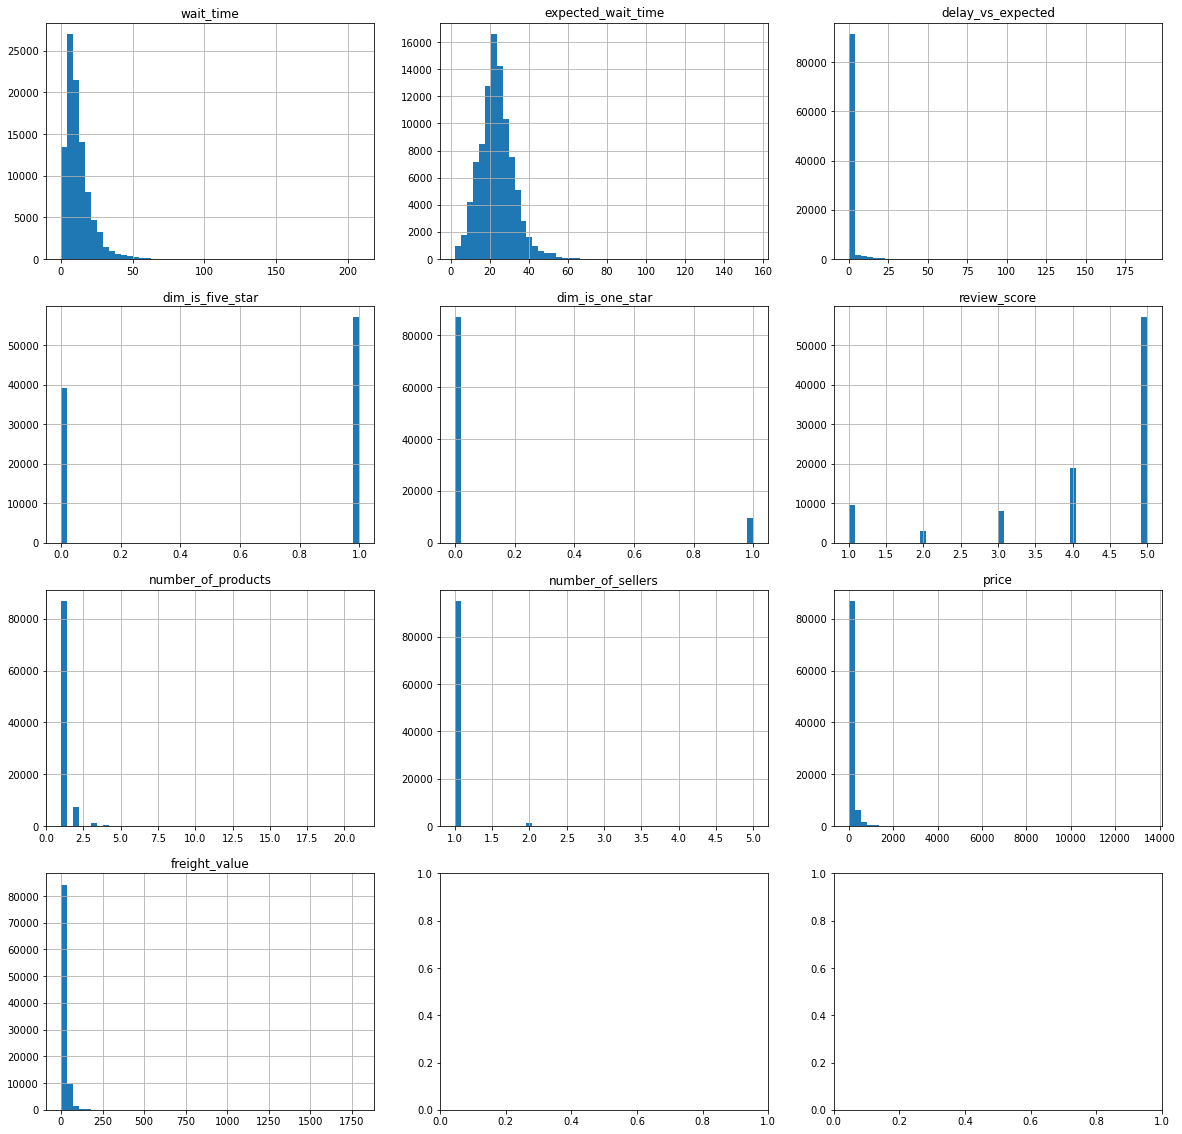

In [7]:
fig, axs = plt.subplots(4,3,figsize=(20,20))
axs = axs.flat

for index, items in enumerate(filtered.columns):
    
    orders[items].hist(ax=axs[index],bins=50)
    axs[index].set_title(items)


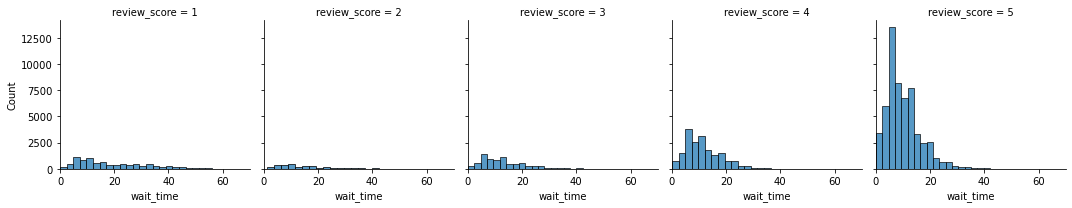

In [8]:
g = sns.FacetGrid(orders,col='review_score', xlim=(0,70))
g.map_dataframe(sns.histplot, x="wait_time",bins=80)

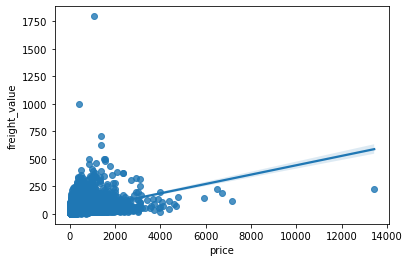

In [9]:
sns.regplot(x=orders['price'],y=orders['freight_value']);

❓The various correlations between features are inspected to confirm which feature seems to the most correlated with review_score

▸ Details * `DataFrame.corr()` is used combined with `sns.heatmap()` and `cmap='coolwarm'` * The absolute values of the correlation coefficients of `review_score` vs. each feature is looked into, * the higher the coefficient, the more one given feature is correlated (positively or negatively) with the `review_score`

C:\Users\star\AppData\Local\Temp\ipykernel_6308\3800333206.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(orders.corr(), cmap='coolwarm', annot=True);


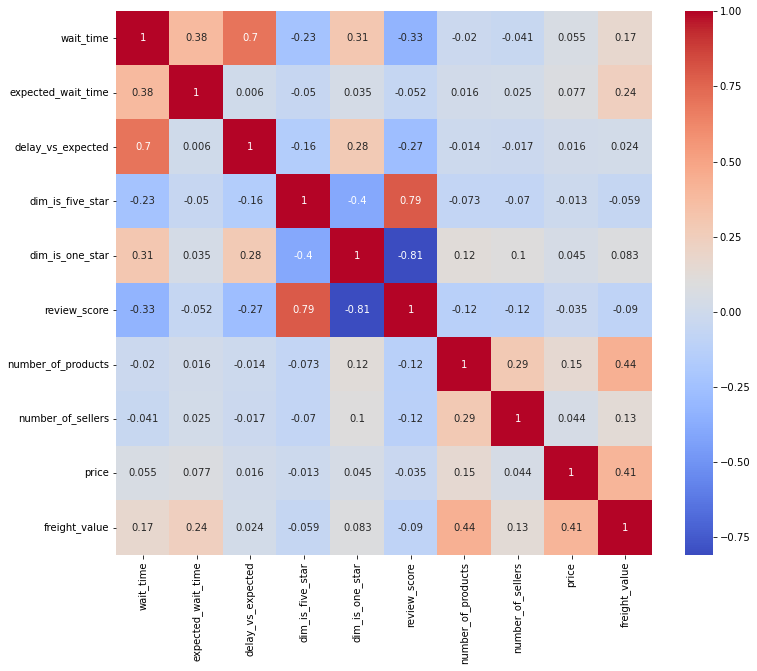

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(orders.corr(), cmap='coolwarm', annot=True);

* 😏 Observations:
    * Other than `review_score` is 100% correlated to itself 
    * and strongly correlated to `dim_is_one_star` and `dim_is_five_star`...
* ⚠️ The two next highest correlation coefficients with respect to the `review_score` will be :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : 27 %

## 2 - Simple regression of `review_score` against delivery duration

👉 So, it seems that `review_score` is mostly correlated with `wait_time` (= - 34%) and `delay_vs_expected` (27%).

🎨 These correlations  are investigated and shown with `seaborn`

### 2.1 Plots
❓ In one figure, 2 subplots are created, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively.

<u>Detail</u>:

- Dataframe are reduced to a random sub-`sample of 10,000 rows` for speed purposes
- `DataFrame.sample()` is used with a fixed `random_state` to avoid changing the sample at each execution if needed
- `sns.regplot()` is used to plot the `regression lines`
- Some `y_jitter` parameters are added to better visualize the scatterplot density
- `xlim` and `ylim` are set to hide outliers

In [11]:
data_sample = orders.sample(n=10000,random_state=1)

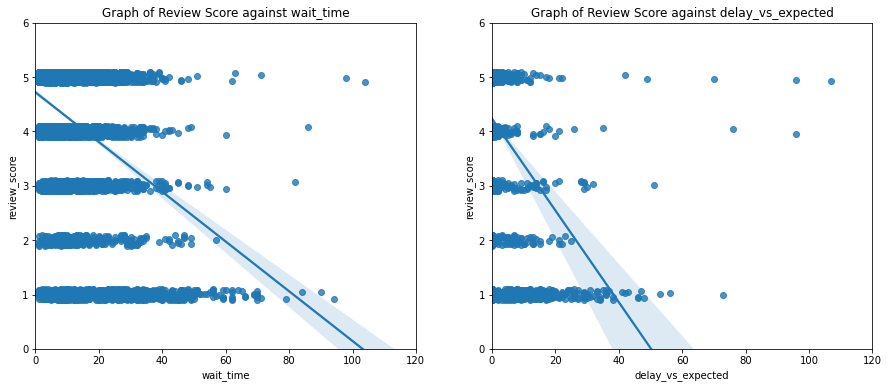

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
wait_time = sns.regplot(x='wait_time',y='review_score',data=data_sample, y_jitter=0.1, ax=ax[0])
wait_time.set_xlim(0,120)
wait_time.set_ylim(0,6)
wait_time.set_title("Graph of Review Score against wait_time")

delay_vs_exp = sns.regplot(x='delay_vs_expected',y='review_score',data=data_sample, y_jitter=0.1, ax=ax[1])
delay_vs_exp.set_xlim(0,120)
delay_vs_exp.set_ylim(0,6);
delay_vs_exp.set_title("Graph of Review Score against delay_vs_expected");

👉 We tried to perform `Linear Regression` to roughly shows the correlation between `review_score` vs. `wait_time` and `delay_vs_exp` 

👉 It doesn't look interpretable as we have only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") that we are trying to regress against two continuous values that are `wait_time` and `delay_vs_exp`.

👀 However, based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score - Well, not surprising. But how fast does the review score decrease ?


### 2.2 Interpretation

❓The  `slope` of each curve are estimated visually and it indicates how rate of score drops when the waiting time increases

- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

### 2.3 Inferential analysis

Even if we had used all 100,000 orders for these regplots, these orders represent 16 months of data after all...

⚠️⚠️⚠️ **How certain** are we that these coefficients are **statistically significant**? ⚠️⚠️⚠️

⚡️ <u> Questions about the statistical significance of these coefficients: </u>

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

🧐 We need to estimate the **`confidence interval`** around the mean value for these two slopes  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

⭐️ Fortunately, `Seaborn` already computes this 95% confidence interval for us with a shaded blue cone around the regression line!

❓Use `Seaborn` `regplot` to visualize the two confidence intervals:
- The `size of your sample dataset` is changed: 
    - Notice how the slope may change as the sample size becomes smaller. 
    - What about the confidence interval?
- The `size of the confidence interval` is changed by playing with the regplot parameter called `ci` (95% by default)

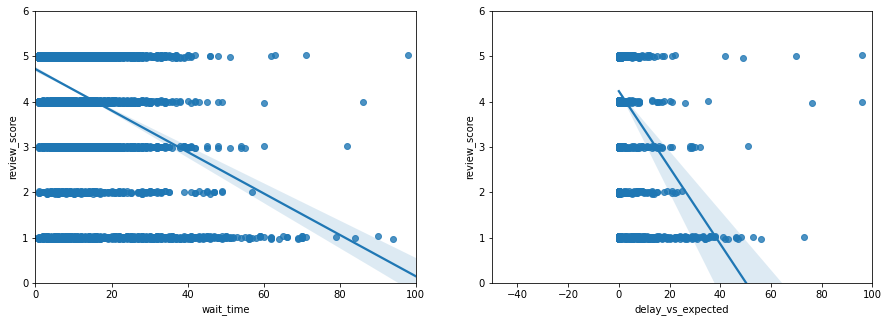

In [13]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
a = sns.regplot(x = "wait_time", y = "review_score", data = data_sample, y_jitter = 0.03, ci = 95)
a.set(xlim = (0,100))
a.set(ylim = (0, 6))

plt.subplot(1,2,2)
b = sns.regplot(x = "delay_vs_expected", y = "review_score", data = data_sample, y_jitter = 0.03, ci = 95)
b.set(xlim = (-50, 100))
b.set(ylim = (0, 6));

🔎 Interpretation:

* **Null Hypothesis** $H_0$ : "this variable does not influence the review score", a.k.a its coefficient is equal to zero

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - 👉 We are `95% confident that slower deliveries are associated with weaker reviews`.
- The **`p-value`** associated with the null hypothesis "the delivery time is almost zero" is lower than 5%
    - 👉 We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

🔥 Our findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can be inherently slower to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review_score, not matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 



### 2.4 Order Value Trend

The following is to identify the spread of average order value. Ideally it will be required to spread into bin size of every 1000 dollars. Further breakdown is conducted if no significant trend is identified.

In [14]:
orders.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,15.0,0.0,delivered,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.0,19.0,0.0,delivered,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.0,26.0,0.0,delivered,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.0,26.0,0.0,delivered,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.0,12.0,0.0,delivered,1,0,5,1,1,19.90,8.72


In [15]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
count,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000
mean,12.058472,23.378317,0.746630,0.592187,0.097610,4.155688,1.141687,1.013918,136.654623,22.757810
std,9.462698,8.756581,4.643318,0.491431,0.296788,1.284979,0.535362,0.123616,207.444085,21.496018
min,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000
25%,6.000000,18.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.840000
50%,10.000000,23.000000,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,86.000000,17.160000
75%,15.000000,28.000000,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,23.990000
max,208.000000,155.000000,189.000000,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000


In [16]:
bins = [*range(0,16000,1000)]
groups = orders.groupby(pd.cut(orders.price, bins)).agg({'order_id':'count','price':'sum'})
groups['mean'] = groups['price']/groups['order_id']
groups.fillna(0, inplace=True)
groups.rename({'price':'range_of_order_value',
               'order_id':'num_of_orders',
               'price':'total_value',
               'mean':'avg_order_value'}, axis='columns', inplace=True)
groups

,num_of_orders,total_value,avg_order_value
price,,,
"(0, 1000]",95458,11723083.34,122.808810
"(1000, 2000]",761,1053944.96,1384.947385
"(2000, 3000]",102,249579.65,2446.859314
"(3000, 4000]",20,69668.52,3483.426000
"(4000, 5000]",7,31037.86,4433.980000
"(5000, 6000]",1,5934.60,5934.600000
"(6000, 7000]",2,13234.00,6617.000000
"(7000, 8000]",1,7160.00,7160.000000
"(8000, 9000]",0,0.00,0.000000


Through the table we can roughly see that most of the orders are less than 1000 dollars, we'll further calculate the percentage of both the percentage of orders and percentage of value to get a more accurate measure

In [17]:
overall_orders = groups['num_of_orders'].sum()
overall_value = groups['total_value'].sum()

groups['order_percentage'] = groups['num_of_orders']/overall_orders*100
groups['total_value_percentage'] = groups['total_value']/overall_value*100
groups

,num_of_orders,total_value,avg_order_value,order_percentage,total_value_percentage
price,,,,,
"(0, 1000]",95458,11723083.34,122.808810,99.071124,89.033261
"(1000, 2000]",761,1053944.96,1384.947385,0.789804,8.004392
"(2000, 3000]",102,249579.65,2446.859314,0.105861,1.895482
"(3000, 4000]",20,69668.52,3483.426000,0.020757,0.529111
"(4000, 5000]",7,31037.86,4433.980000,0.007265,0.235723
"(5000, 6000]",1,5934.60,5934.600000,0.001038,0.045071
"(6000, 7000]",2,13234.00,6617.000000,0.002076,0.100508
"(7000, 8000]",1,7160.00,7160.000000,0.001038,0.054378
"(8000, 9000]",0,0.00,0.000000,0.000000,0.000000


Further breakdown to analyse the distribution of orders below 1000dollars since it encompasses 99 percent of the orders

In [18]:
bins = [*range(0,1100,200)]
range2 = orders[orders['price']<=1000]
groups2 = range2.groupby(pd.cut(range2.price, bins)).agg({'order_id':'count','price':'sum'})
groups2['mean'] = groups2['price']/groups2['order_id']
groups2.fillna(0, inplace=True)
groups2.rename({'price':'range_of_order_value',
               'order_id':'num_of_orders',
               'price':'total_value',
               'mean':'avg_order_value'}, axis='columns', inplace=True)
groups2

,num_of_orders,total_value,avg_order_value
price,,,
"(0, 200]",81873,6654889.48,81.283078
"(200, 400]",9853,2766720.17,280.799774
"(400, 600]",2166,1090373.73,503.404307
"(600, 800]",1016,714237.02,702.989193
"(800, 1000]",550,496862.94,903.387164


In [19]:
groups2['order_percentage'] = groups2['num_of_orders']/overall_orders*100
groups2['total_value_percentage'] = groups2['total_value']/overall_value*100
groups2

,num_of_orders,total_value,avg_order_value,order_percentage,total_value_percentage
price,,,,,
"(0, 200]",81873,6654889.48,81.283078,84.971926,50.541867
"(200, 400]",9853,2766720.17,280.799774,10.225940,21.012400
"(400, 600]",2166,1090373.73,503.404307,2.247984,8.281058
"(600, 800]",1016,714237.02,702.989193,1.054456,5.424413
"(800, 1000]",550,496862.94,903.387164,0.570818,3.773523


We can see that around 85% of the all orders are less than 200 dollars and it covers 50% of overall sales. The next range of between 200 and 400 dollars order value covered the 10% of all orders and around 20% of overall sales

In [20]:
orders

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,15.0,0.0,delivered,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.0,19.0,0.0,delivered,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.0,26.0,0.0,delivered,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.0,26.0,0.0,delivered,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.0,12.0,0.0,delivered,1,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,8.0,18.0,0.0,delivered,1,0,5,1,1,72.00,13.08
96357,63943bddc261676b46f01ca7ac2f7bd8,22.0,23.0,0.0,delivered,0,0,4,1,1,174.90,20.10
96358,83c1379a015df1e13d02aae0204711ab,24.0,30.0,0.0,delivered,1,0,5,1,1,205.99,65.02
96359,11c177c8e97725db2631073c19f07b62,17.0,37.0,0.0,delivered,0,0,2,2,1,359.98,81.18


Attempt to calculate value of a negative review, we start by attempt to find out the customer lifetime value

In [21]:
# Import olist data
from olist.data import Olist
olist = Olist()
data = olist.get_data()

# list of accessible dataset
data.keys()

dict_keys(['customers', 'geolocation', 'orders', 'order_items', 'order_payments', 'order_reviews', 'products', 'sellers', 'product_category_name_translation'])

In [22]:
#to get the time period of all the reviews of the orders
base1 = data['orders'][['order_id','customer_id','order_purchase_timestamp']]
base2 = data['order_reviews'][['review_id','order_id','review_score']]

#setting them to be same index in order to merge the 2 tables
clv_base = base1.set_index('order_id').join(base2.set_index('order_id'))

#else converting dtype into datetime64 
clv_base['order_purchase_timestamp'] = pd.to_datetime(clv_base['order_purchase_timestamp'])
clv_base

,customer_id,order_purchase_timestamp,review_id,review_score
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,97ca439bc427b48bc1cd7177abe71365,5.0
00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,7b07bacd811c4117b742569b04ce3580,4.0
000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,0c5b33dea94867d1ac402749e5438e8b,5.0
00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,f4028d019cb58564807486a6aaf33817,4.0
00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,940144190dcba6351888cafa43f3a3a5,5.0
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23 13:57:06,9185f849f32d82e216a4e025e0c50f5c,5.0
fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,2018-07-14 10:26:46,be803f6a93d64719fd685c1cc610918a,5.0
fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,2017-10-23 17:07:56,dbdd81cd59a1a9f94a10a990b4d48dce,5.0


In [23]:
clv_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99992 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               99992 non-null  object        
 1   order_purchase_timestamp  99992 non-null  datetime64[ns]
 2   review_id                 99224 non-null  object        
 3   review_score              99224 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.8+ MB


In [24]:
clv = clv_base.groupby(by=[clv_base['order_purchase_timestamp'].dt.year,
                         clv_base['order_purchase_timestamp'].dt.month, 
                         clv_base['review_score']]).count()
clv.index.names = ['year','month','review_score']
clv = clv[['customer_id']]
clv.columns = ['num_of_reviews']
clv

num_of_reviews
year month review_score                
2016 9     1.0                        4
     10    1.0                       85
           2.0                        8
           3.0                       22
           4.0                       51
...                                 ...
2018 9     4.0                        1
           5.0                        1
     10    1.0                        2
           2.0                        1
           5.0                        1

[115 rows x 1 columns]

In [45]:
ans = clv.reset_index()
ans['year_month']=ans[['year','month']].apply(lambda x: "-".join(map(str,x))+"-01", axis=1)
ans

,year,month,review_score,num_of_reviews,year_month
0,2016,9,1.0,4,2016-9-01
1,2016,10,1.0,85,2016-10-01
2,2016,10,2.0,8,2016-10-01
3,2016,10,3.0,22,2016-10-01
4,2016,10,4.0,51,2016-10-01
...,...,...,...,...,...
110,2018,9,4.0,1,2018-9-01
111,2018,9,5.0,1,2018-9-01
112,2018,10,1.0,2,2018-10-01
113,2018,10,2.0,1,2018-10-01


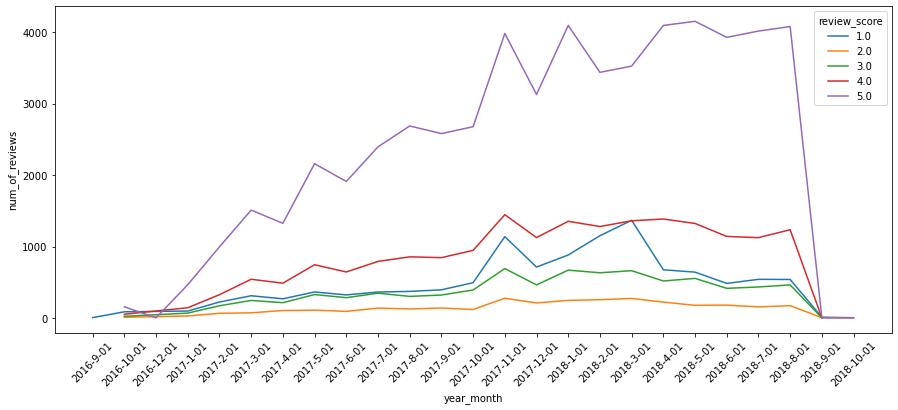

In [54]:
fig,ax = plt.subplots(figsize=(15,6))
sns.lineplot(ans,x='year_month', y='num_of_reviews',hue='review_score', ax=ax, palette='tab10')
plt.xticks(rotation=45);

From the plotted graph, we can see that number of 5 star reviews consistently increases from the period Oct 2016 all the way till Aug 2018. Due to the large increase of 5 star reviews, the fluctuations of 1 star reviews are diminished. We'll isolate out to separately plot a graph for the number of 1 star reviews and their percentage against this time period. 

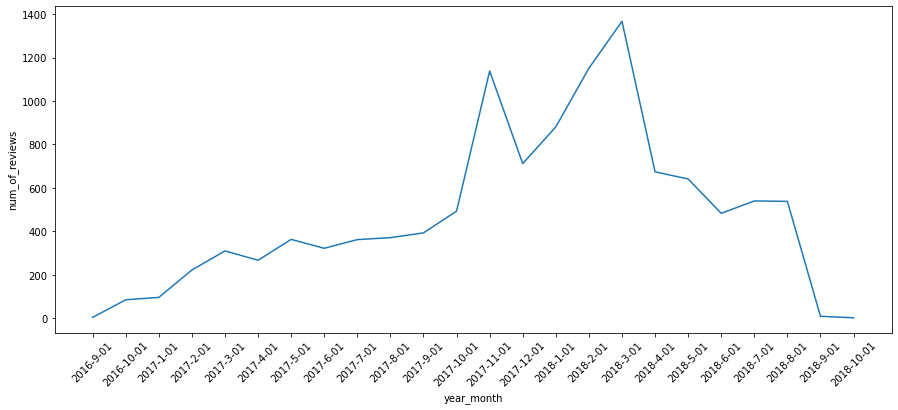

In [62]:
neg_review = ans[ans['review_score']==1]

fig,ax = plt.subplots(figsize=(15,6))
sns.lineplot(neg_review,x='year_month', y='num_of_reviews', ax=ax)
plt.xticks(rotation=45);